<a href="https://colab.research.google.com/github/jibbsmathew/Face-Recognition-with-CNN/blob/main/Face_recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 8.5 MB/s eta 0:00:00


In [2]:
#Importing the sklearn face of celbrity dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)

In [3]:
#Importing all the necessary libraries for the CNN network and for the normal Logistic Regression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, add, Activation, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.layers import LeakyReLU
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import visualkeras
import cv2
from google.colab.patches import cv2_imshow

%matplotlib inline

In [4]:
#Verify the name of the celebrity and the shape of the input image
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


In [5]:
#Creating the input X variable and the output y variable and creating a 8 vector matrix for the output variable
X = faces.images
y = faces.target
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
y = y.reshape(X.shape[0], 1)

yy = pd.DataFrame(y)
yy.columns = ["Trgt"]
Y = pd.get_dummies(yy["Trgt"], prefix='target')
y=np.array(Y)

print(X.shape)
print(y.shape)
numclass=y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

(1560, 62, 47, 1)
(1560, 12)


In [6]:
#Convolutional Neural Network installation and establishing the other needed layers of Covolutional filters,
#MaxPoolng, Hidden layers and compilation layer

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(62,47,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(numclass, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

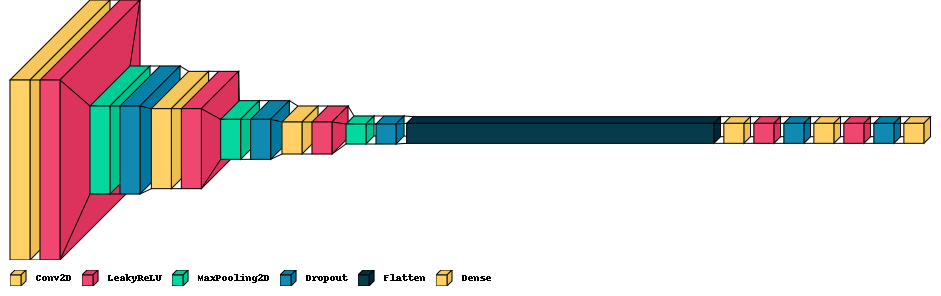

In [7]:
visualkeras.layered_view(model, to_file='output.png',legend=True)
image = cv2.imread("output.png")
cv2_imshow(image)

In [8]:
#Model fit of the training dataset
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
H1 = model.fit(X_train, y_train, epochs=150, batch_size=100, verbose=1, validation_split=0.1,callbacks=[callback])

Epoch 1/150
12/12 [==============================] - 15s 898ms/step - loss: 2.2702 - accuracy: 0.3037 - val_loss: 2.2329 - val_accuracy: 0.3520
Epoch 2/150
12/12 [==============================] - 11s 907ms/step - loss: 2.2277 - accuracy: 0.3348 - val_loss: 2.2337 - val_accuracy: 0.3520
Epoch 3/150
12/12 [==============================] - 9s 719ms/step - loss: 2.1943 - accuracy: 0.3357 - val_loss: 2.2479 - val_accuracy: 0.3520
Epoch 4/150
12/12 [==============================] - 5s 429ms/step - loss: 2.1889 - accuracy: 0.3366 - val_loss: 2.2831 - val_accuracy: 0.3520
Epoch 5/150
12/12 [==============================] - 6s 528ms/step - loss: 2.1906 - accuracy: 0.3357 - val_loss: 2.2017 - val_accuracy: 0.3520
Epoch 6/150
12/12 [==============================] - 5s 419ms/step - loss: 2.1735 - accuracy: 0.3304 - val_loss: 2.1376 - val_accuracy: 0.3520
Epoch 7/150
12/12 [==============================] - 6s 529ms/step - loss: 2.1478 - accuracy: 0.3384 - val_loss: 2.1655 - val_accuracy: 0.35

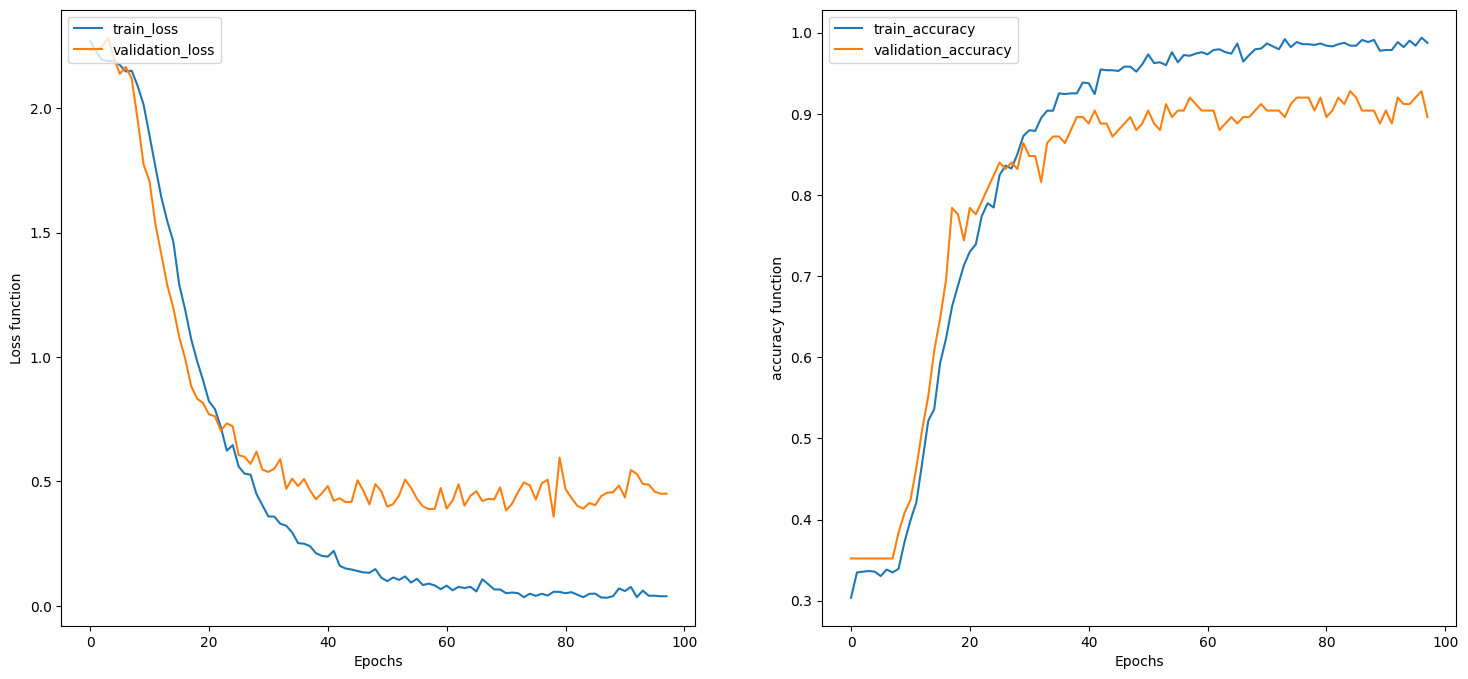

In [9]:
#Plotting the resultant loss and the accuracy of the training and validation model
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(H1.history["loss"], label='train_loss')
plt.plot(H1.history["val_loss"], label='validation_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss function")
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H1.history["accuracy"], label='train_accuracy')
plt.plot(H1.history["val_accuracy"], label='validation_accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy function")
plt.legend(loc='upper left')
plt.show()

In [10]:
y_pred = model.predict(X_test)
print("The accuracy of the predicted value from the model against the test value:", (1-np.mean(np.abs(y_pred-y_test)))*100)
loss, accuracy = model.evaluate(X_test, y_test)
print("The loss value of the test dataset", loss)
print("The accuracy value of the test dataset:", accuracy*100)

10/10 [==============================] - 0s 35ms/step
The accuracy of the predicted value from the model against the test value: 98.40499013662338
10/10 [==============================] - 0s 36ms/step - loss: 0.3978 - accuracy: 0.9071
The loss value of the test dataset 0.39779824018478394
The accuracy value of the test dataset: 90.70512652397156


In [11]:
n_samples, h, w = faces.images.shape
target_names = faces.target_names

In [12]:
y_test=np.argmax(y_test, axis=-1)
y_pred=np.argmax(y_pred, axis=-1)

In [13]:
y_pred.shape

(312,)

In [14]:
print(classification_report(y_test,y_pred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.82      0.75        11
     Colin Powell       0.96      0.95      0.95        55
  Donald Rumsfeld       0.95      0.80      0.87        25
    George W Bush       0.95      0.93      0.94       107
Gerhard Schroeder       0.80      0.95      0.87        21
      Hugo Chavez       1.00      0.71      0.83        14
   Jacques Chirac       0.78      1.00      0.88         7
    Jean Chretien       0.75      1.00      0.86        12
    John Ashcroft       0.86      1.00      0.92        12
Junichiro Koizumi       0.89      1.00      0.94         8
  Serena Williams       0.86      0.86      0.86         7
       Tony Blair       0.93      0.85      0.89        33

         accuracy                           0.91       312
        macro avg       0.87      0.91      0.88       312
     weighted avg       0.92      0.91      0.91       312



In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
cm = confusion_matrix(y_test, y_pred)

In [17]:
print(cm)

[[ 9  0  0  0  0  0  0  1  1  0  0  0]
 [ 0 52  0  1  0  0  0  1  0  0  1  0]
 [ 1  1 20  0  1  0  1  0  0  0  0  1]
 [ 1  0  1 99  2  0  1  1  0  1  0  1]
 [ 0  0  0  1 20  0  0  0  0  0  0  0]
 [ 1  0  0  2  0 10  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  1  0  1  2  0  0  1  0  0  0 28]]


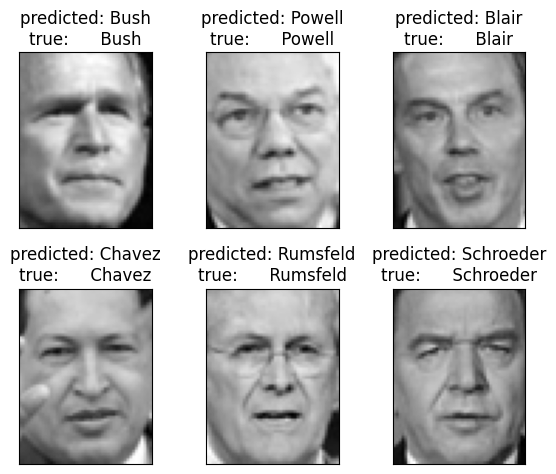

In [18]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    i=0
    k=0
    t=[]
    while(k<6):
        plt.subplot(n_row, n_col, k + 1)
        if(titles[i] in t):
          i=i+1
          continue
        else:
          plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
          plt.title(titles[i], size=12)
          plt.xticks(())
          plt.yticks(())
          t.append(titles[i])
          k=k+1
        i=i+1


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

plt.show()